IMPORT THE REQUIRED PACKAGES 

In [1]:
import torch 
import torchvision 
from torchvision import datasets,transforms
from torch import nn
import torch.nn.functional as f
from torch import optim

C:\Users\amrav\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


DEFINING THE TRANSORM TO NORMALIZE THE DATA

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                       transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5),)
                       ])



DOWNLOAD THE TRAINING DATA TO THE PATH SPECIFIED

In [3]:
trainset = datasets.MNIST( 'Downloads', download = True ,train = True, transform = transform)

Processing...
Done!


LOAD THE TRAINING DATA

In [4]:
trainloader = torch.utils.data.DataLoader(trainset, shuffle = True ,batch_size = 32)

BUILD THE FEED FORWARD NETWORK

In [5]:
model = nn.Sequential(nn.Linear(28*28 , 512),
                     nn.ReLU(),
                     nn.Linear(512,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1))

DEINFE CRITERION AND OPTIMIZER 

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01 )

GET THE DATA AND FLATTEN IT 
FORWARD PASS TO GET LOG PROBABILITES AND THEN CALCULATE THE LOSS

In [7]:
images, labels = next(iter(trainloader))
images = images.view(images.shape[0],-1)

logps = model(images)
loss = criterion(logps,labels)

TRAIN THE MODEL 

In [8]:
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.6878729490478833
Training loss: 0.30749191577235857
Training loss: 0.2524286225547393
Training loss: 0.20955484150846798
Training loss: 0.17584710626800856


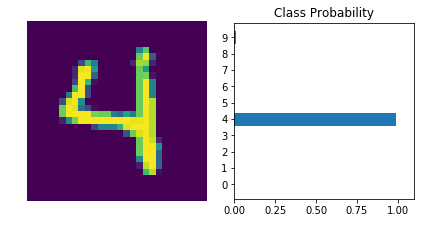

In [17]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)